In [3]:
### How to look at the annotations

crispr_depmap.data.head()
crispr_depmap.col_annotation
#crispr_depmap.col_names[:10]

,PatientID,CellLineName,StrippedCellLineName,Age,SourceType,SangerModelID,RRID,DepmapModelType,GrowthPattern,MolecularSubtype,...,SourceDetail,CatalogNumber,CCLEName,COSMICID,PublicComments,WTSIMasterCellID,OncotreeCode,OncotreeSubtype,OncotreePrimaryDisease,OncotreeLineage
ACH-000004,PT-q4K2cp,HEL,HEL,30.0,Commercial,SIDM00594,CVCL_0001,AML,Suspension,nan,...,DSMZ,nan,HEL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,907053.0,nan,783.0,AML,Acute Myeloid Leukemia,Acute Myeloid Leukemia,Myeloid
ACH-000005,PT-q4K2cp,HEL 92.1.7,HEL9217,30.0,Commercial,SIDM00593,CVCL_2481,AML,Unknown,nan,...,ATCC,nan,HEL9217_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,nan,nan,nan,AML,Acute Myeloid Leukemia,Acute Myeloid Leukemia,Myeloid
ACH-000007,PT-NOXwpH,LS513,LS513,63.0,Commercial,SIDM00677,CVCL_1386,COAD,Adherent,nan,...,ATCC,nan,LS513_LARGE_INTESTINE,907795.0,nan,569.0,COAD,Colon Adenocarcinoma,Colorectal Adenocarcinoma,Bowel
ACH-000009,PT-puKIyc,C2BBe1,C2BBE1,72.0,Commercial,SIDM01233,CVCL_1096,COAD,Adherent,nan,...,ATCC,nan,C2BBE1_LARGE_INTESTINE,910700.0,nan,2104.0,COAD,Colon Adenocarcinoma,Colorectal Adenocarcinoma,Bowel
ACH-000011,PT-AR7W9o,253J,253J,53.0,Commercial,nan,CVCL_7935,BLCA,Unknown,nan,...,KCLB,nan,253J_URINARY_TRACT,nan,nan,nan,BLCA,Bladder Urothelial Carcinoma,Bladder Urothelial Carcinoma,Bladder/Urinary Tract
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-002296,PT-oqands,PCI-38,PCI38,56.0,nan,SIDM00155,CVCL_M471,OCSC,nan,nan,...,Sanger,nan,PCI38_UPPER_AERODIGESTIVE_TRACT,1240205.0,nan,334.0,OCSC,Oral Cavity Squamous Cell Carcinoma,Head and Neck Squamous Cell Carcinoma,Head and Neck
ACH-002297,PT-kYHcXz,PCI-4B,PCI4B,51.0,nan,SIDM00043,CVCL_C171,LXSC,nan,nan,...,Sanger,nan,PCI4B_UPPER_AERODIGESTIVE_TRACT,1298531.0,nan,1068.0,LXSC,Larynx Squamous Cell Carcinoma,Head and Neck Squamous Cell Carcinoma,Head and Neck
ACH-002298,PT-mnzvO8,PCI-6A,PCI6A,81.0,nan,SIDM00115,CVCL_C173,OCSC,nan,nan,...,Sanger,nan,PCI6A_UPPER_AERODIGESTIVE_TRACT,1240206.0,nan,1218.0,OCSC,Oral Cavity Squamous Cell Carcinoma,Head and Neck Squamous Cell Carcinoma,Head and Neck
ACH-002304,PT-bxaITj,SK-MG-1,SKMG1,nan,nan,SIDM00379,CVCL_1698,ASTR,nan,nan,...,Sanger,nan,SKMG1_CENTRAL_NERVOUS_SYSTEM,909729.0,This line is a Marcus derivative (ICLAC). DepM...,578.0,ASTR,Astrocytoma,Diffuse Glioma,CNS/Brain


In [4]:
disease_list = set(crispr_depmap.col_annotation['OncotreePrimaryDisease'])
disease_list
# Invasive Breast Carcinoma

{'Acute Myeloid Leukemia',
 'Adenosquamous Carcinoma of the Pancreas',
 'Ampullary Carcinoma',
 'Anaplastic Thyroid Cancer',
 'B-Lymphoblastic Leukemia/Lymphoma',
 'Bladder Squamous Cell Carcinoma',
 'Bladder Urothelial Carcinoma',
 'Breast Ductal Carcinoma In Situ',
 'Breast Neoplasm, NOS',
 'Cervical Adenocarcinoma',
 'Cervical Squamous Cell Carcinoma',
 'Chondrosarcoma',
 'Colorectal Adenocarcinoma',
 'Cutaneous Squamous Cell Carcinoma',
 'Diffuse Glioma',
 'Embryonal Tumor',
 'Endometrial Carcinoma',
 'Epithelioid Sarcoma',
 'Esophageal Squamous Cell Carcinoma',
 'Esophagogastric Adenocarcinoma',
 'Ewing Sarcoma',
 'Extra Gonadal Germ Cell Tumor',
 'Fibrosarcoma',
 'Gestational Trophoblastic Disease',
 'Glassy Cell Carcinoma of the Cervix',
 'Head and Neck Carcinoma, Other',
 'Head and Neck Squamous Cell Carcinoma',
 'Hepatoblastoma',
 'Hepatocellular Carcinoma',
 'Hepatocellular Carcinoma plus Intrahepatic Cholangiocarcinoma',
 'Hodgkin Lymphoma',
 'Intracholecystic Papillary Neop

In [45]:
### Looking at just one indication

# crispr_depmap.row_names
truth_map1 = (crispr_depmap.col_annotation['OncotreeLineage'] == 'Skin')

breast_data = crispr_depmap.data.loc[:,truth_map1]
breast_data

truth_map2 = (crispr_depmap.col_annotation['OncotreeLineage'] != 'Skin')

test_data = stats.ttest_ind(breast_data, crispr_depmap.data.loc[:,truth_map2], axis=1, alternative='less')
test_data
gene_stats = pd.DataFrame(test_data, columns = breast_data.index, index = ['T-value', 'P-value'])
# gene_stats.loc['P-value'] < 0.1
gene_stats.loc[:,(gene_stats.loc['P-value'] < 0.5)]


gene_stats
# gene_stats
# plt.hist(gene_stats.loc['P-value'])
# gene_stats.loc['P-value']

adjusted_data = statsmodels.stats.multitest.multipletests(gene_stats.loc['P-value'], alpha=0.05, method='fdr_bh')
gene_stats.loc['Adjusted P_val'] = adjusted_data[1]
gene_stats.loc[:,(gene_stats.loc['Adjusted P_val'] < 0.05)]

,AACS,AADACL2,ABCA12,ABCB6,ABHD1,ABHD17C,ABT1,ACADL,ACD,ACLY,...,ZNF593,ZNF639,ZNF654,ZNF672,ZNF692,ZNF699,ZNF746,ZNF789,ZNF830,ZSCAN2
T-value,-5.112479e+00,-3.136767,-3.410394,-3.785259,-3.570829,-3.612208,-3.394221,-2.909426,-3.451701,-6.454834e+00,...,-3.848324,-4.001972,-7.437104e+00,-3.729799,-3.085840,-3.296551,-4.190390,-5.662663e+00,-3.181202,-2.950933
P-value,1.880669e-07,0.000877,0.000336,0.000081,0.000186,0.000159,0.000357,0.001848,0.000289,8.178724e-11,...,0.000063,0.000034,1.048958e-13,0.000101,0.001041,0.000505,0.000015,9.556740e-09,0.000754,0.001618
Adjusted P_val,3.491843e-05,0.026263,0.013253,0.004597,0.008444,0.007532,0.013895,0.044297,0.011967,3.568582e-08,...,0.003789,0.002451,7.322986e-11,0.005332,0.029394,0.017564,0.001280,2.527178e-06,0.023285,0.039988


In [290]:
# breast_data.loc['BRCA1']
# crispr_depmap.data.loc['BRCA1']
# gene_stats.T.index

crispr_depmap.row_names
truth_map1 = (crispr_depmap.col_annotation['OncotreeLineage'] == 'Other')

breast_data = crispr_depmap.data.loc[:,truth_map1]
breast_data


,ACH-002198
A1BG,0.053546
A1CF,-0.177507
A2M,0.220634
A2ML1,-0.048849
A3GALT2,-0.075503
...,...
ZYG11A,-0.128079
ZYG11B,-0.146490
ZYX,-0.163068
ZZEF1,0.107803


In [ ]:
disease_list = set(crispr_depmap.col_annotation['OncotreeLineage'])
df_result = pd.DataFrame(columns = ['Indication', 'T_val', 'P_val', 'Adjusted P_val'])

for ind in disease_list:
    truth_map1 = crispr_depmap.col_annotation['OncotreeLineage'] == ind
    ind_data = crispr_depmap.data.loc[:,truth_map1]
    
    truth_map2 = crispr_depmap.col_annotation['OncotreeLineage'] != ind
    test_data = stats.ttest_ind(ind_data, crispr_depmap.data.loc[:,truth_map2], axis=1, alternative='less')
    gene_stats = pd.DataFrame(test_data, columns = ind_data.index, index = ['T_val', 'P_val'])
    
    adjusted_data = statsmodels.stats.multitest.multipletests(gene_stats.loc['P_val'], alpha=0.05, method='fdr_bh')
    gene_stats.loc['Adjusted P_val'] = adjusted_data[1]
    df_result = pd.concat([df_result, gene_stats.T]).fillna(ind)
    
df_result

/scratch/tmp/25955666.1.default.q/ipykernel_12262/2834946591.py:9: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  test_data = stats.ttest_ind(ind_data, crispr_depmap.data.loc[:,truth_map2], axis=1, alternative='less')
/usr/prog/scicomp/pythonds/v1.2/pyds_v1.2/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1253: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/usr/prog/scicomp/pythonds/v1.2/pyds_v1.2/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1253: RuntimeWarning: invalid value encountered in multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/scratch/tmp/25955666.1.default.q/ipykernel_12262/2834946591.py:9: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. 

,Indication,T_val,P_val,Adjusted P_val
A1BG,Uterus,-2.129301,0.016728,0.272701
A1CF,Uterus,-1.691267,0.045538,0.430303
A2M,Uterus,0.738962,0.769954,1.0
A2ML1,Uterus,-2.485048,0.006552,0.176959
A3GALT2,Uterus,-0.540961,0.294323,0.906285
...,...,...,...,...
ZYG11A,Prostate,0.126825,0.550449,0.999968
ZYG11B,Prostate,0.245298,0.596864,0.999968
ZYX,Prostate,-0.642626,0.260302,0.999968
ZZEF1,Prostate,0.346528,0.635493,0.999968


In [34]:
### FINAL CODE
# disease_list = set(crispr_depmap.col_annotation['OncotreeLineage'])
# Take out diseases with less than 4 cell samples
a = crispr_depmap.col_annotation['OncotreeLineage'].value_counts()
sufficient_n = crispr_depmap.col_annotation[crispr_depmap.col_annotation['OncotreeLineage'].isin(a[a>4].index)]
# crispr_depmap = crispr_depmap.data.loc[:,crispr_depmap.col_annotation['OncotreeLineage'].isin(a[a>4].index)]
disease_list = set(sufficient_n['OncotreeLineage'])

genes = crispr_depmap.data.index
df_result = pd.DataFrame(columns = ['Gene', 'Indication', 'T_val', 'P_val', 'Adjusted P_val'])

for ind in disease_list:
    # Get the data for this indication
    truth_map1 = crispr_depmap.col_annotation['OncotreeLineage'] == ind
    ind_data = crispr_depmap.data.loc[:,truth_map1]
    
    # Perform an independent t-test between this indication and all others, for each gene
    truth_map2 = crispr_depmap.col_annotation['OncotreeLineage'] != ind
    test_data = stats.ttest_ind(ind_data, crispr_depmap.data.loc[:,truth_map2], axis=1, alternative='less')
    gene_stats = pd.DataFrame(test_data, index = ['T_val', 'P_val'])
    
    # Calculate adjusted P-values
    adjusted_data = statsmodels.stats.multitest.multipletests(gene_stats.loc['P_val'], alpha=0.05, method='fdr_bh')
    gene_stats.loc['Adjusted P_val'] = adjusted_data[1]
    
    # Add gene column
    gene_stats = gene_stats.T
    gene_stats.insert(loc=0, column='Gene', value=genes)
    gene_stats.insert(loc=1, column='Indication', value=ind)
    
    # Add this indication's gene stats to the overall DataFrame
    df_result = pd.concat([df_result, gene_stats])
    
ttest_result = df_result

# ttest_result.to_csv("ttest_result.csv")
ttest_result.to_csv("ttest_compressed_23Q2.csv.gz",compression='gzip')

ttest_result

,Gene,Indication,T_val,P_val,Adjusted P_val
0,A1BG,Cervix,0.305324,0.619911,1.000000
1,A1CF,Cervix,-0.901838,0.183672,0.835932
2,A2M,Cervix,0.317828,0.624662,1.000000
3,A2ML1,Cervix,-0.027315,0.489107,1.000000
4,A3GALT2,Cervix,-1.017488,0.154575,0.797005
...,...,...,...,...,...
17448,ZYG11A,Myeloid,1.057262,0.854685,1.000000
17449,ZYG11B,Myeloid,2.127200,0.983185,1.000000
17450,ZYX,Myeloid,3.747712,0.999906,1.000000
17451,ZZEF1,Myeloid,0.780080,0.782242,1.000000


In [12]:
df_result.loc[(df_result['Gene'] == 'EGFR') & (df_result['Adjusted P_val'] < 0.05)]

# a = crispr_depmap.col_annotation['OncotreeLineage'].value_counts()
# a[a>4].index
# hello = crispr_depmap.data.loc[:,crispr_depmap.col_annotation['OncotreeLineage'].isin(a[a>4].index)]
# hello
# # crispr_depmap.data
# a = crispr_depmap.col_annotation['OncotreeLineage'].value_counts()
# b = crispr_depmap.col_annotation[crispr_depmap.col_annotation['OncotreeLineage'].isin(a[a>4].index)]
# # crispr_depmap = crispr_depmap.data.loc[:,crispr_depmap.col_annotation['OncotreeLineage'].isin(a[a>4].index)]

,Gene,Indication,T_val,P_val,Adjusted P_val
4467,EGFR,Biliary Tract,-5.405740,3.973589e-08,2.311702e-04
4467,EGFR,Prostate,-3.851407,6.218687e-05,4.933398e-02
4467,EGFR,Head and Neck,-10.292458,4.617306e-24,2.014646e-20


In [33]:
### FINAL CODE
# Take out diseases with less than 4 cell samples
a = crispr_depmap.col_annotation['OncotreeLineage'].value_counts()
sufficient_n = crispr_depmap.col_annotation[crispr_depmap.col_annotation['OncotreeLineage'].isin(a[a>4].index)]
disease_list = set(sufficient_n['OncotreeLineage'])

genes = crispr_depmap.data.index
df_result = pd.DataFrame(columns = ['Gene', 'Indication', 'U_val', 'P_val', 'Adjusted P_val'])

for ind in disease_list:
    # Get the data for this indication
    truth_map1 = crispr_depmap.col_annotation['OncotreeLineage'] == ind
    ind_data = crispr_depmap.data.loc[:,truth_map1]
    
    # Perform an independent t-test between this indication and all others, for each gene
    truth_map2 = crispr_depmap.col_annotation['OncotreeLineage'] != ind
    test_data = stats.ranksums(ind_data, crispr_depmap.data.loc[:,truth_map2], axis=1, alternative='less')
    gene_stats = pd.DataFrame(test_data, index = ['U_val', 'P_val'])
    
    # Calculate adjusted P-values
    adjusted_data = statsmodels.stats.multitest.multipletests(gene_stats.loc['P_val'], alpha=0.05, method='fdr_bh')
    gene_stats.loc['Adjusted P_val'] = adjusted_data[1]
    
    # Add gene column
    gene_stats = gene_stats.T
    gene_stats.insert(loc=0, column='Gene', value=genes)
    gene_stats.insert(loc=1, column='Indication', value=ind)
    
    # Add this indication's gene stats to the overall DataFrame
    df_result = pd.concat([df_result, gene_stats])
    
ranksum_result = df_result

# ranksum_result.to_csv("ranksum_result.csv")
ranksum_result.to_csv("ranksum_compressed.csv.gz",compression='gzip')

ranksum_result

,Gene,Indication,U_val,P_val,Adjusted P_val
0,A1BG,Cervix,0.114251,0.545481,1.000000
1,A1CF,Cervix,-1.149186,0.125240,0.657385
2,A2M,Cervix,0.374948,0.646150,1.000000
3,A2ML1,Cervix,0.090694,0.536132,1.000000
4,A3GALT2,Cervix,-0.996066,0.159609,0.716595
...,...,...,...,...,...
17448,ZYG11A,Myeloid,0.751478,0.773817,1.000000
17449,ZYG11B,Myeloid,1.681623,0.953679,1.000000
17450,ZYX,Myeloid,3.727835,0.999903,1.000000
17451,ZZEF1,Myeloid,0.894412,0.814449,1.000000


In [20]:
ranksum_result.loc[(ranksum_result['Gene'] == 'BRAF') & (ranksum_result['Adjusted P_val'] < 0.05)]

,Gene,Indication,U_val,P_val,Adjusted P_val
1571,BRAF,Skin,-9.851053,3.391484e-23,2.959579e-19
1571,BRAF,Bowel,-4.141332,1.726473e-05,1.995505e-03


In [23]:
### Skin cancer and one gene --- Fisher's Exact Test

truth_map1 = (crispr_depmap.col_annotation['OncotreeLineage'] == 'Skin')
skin_data = crispr_depmap.data.loc[:,truth_map1]
gene  = skin_data.index[0]

ind1 = skin_data.loc[:,(skin_data.loc['BRAF'] < -0.6)]
ind1 = len(ind1.columns)

ind2 = len(skin_data.columns) - ind1



# gene_stats.loc[:,(gene_stats.loc['Adjusted P_val'] < 0.05)]

truth_map2 = (crispr_depmap.col_annotation['OncotreeLineage'] != 'Skin')
other_data = crispr_depmap.data.loc[:,truth_map2]

oth1 = other_data.loc[:, (other_data.loc['BRAF'] < -0.6)]
oth1 = len(oth1.columns)
oth2 = len(other_data.columns) - oth1

temp_table = [[ind1, oth1], [ind2, oth2]]

# test_data = stats.ranksums(skin_data, crispr_depmap.data.loc[:,truth_map2], axis=1, alternative='less')
# odd_ratio, p_value = stats.fisher_exact(data)
test_data = stats.fisher_exact(temp_table, alternative='greater')

test_data

(57.63428571428572, 2.977371304204536e-38)

In [36]:
### Skin cancer and all genes --- Fisher's Exact Test
df_result = pd.DataFrame(columns = ['Gene', 'Indication', 'Prob_Ratio', 'P_val'])

ind = 'Skin'
truth_map1 = (crispr_depmap.col_annotation['OncotreeLineage'] == ind)
skin_data = crispr_depmap.data.loc[:,truth_map1]

truth_map2 = (crispr_depmap.col_annotation['OncotreeLineage'] != ind)
other_data = crispr_depmap.data.loc[:,truth_map2]

for gene in skin_data.index:
    ind1 = skin_data.loc[:,(skin_data.loc[gene] < -0.6)]
    ind1 = len(ind1.columns)
    ind2 = len(skin_data.columns) - ind1

    oth1 = other_data.loc[:, (other_data.loc[gene] < -0.6)]
    oth1 = len(oth1.columns)
    oth2 = len(other_data.columns) - oth1

    temp_table = [[ind1, oth1], [ind2, oth2]]
    prob_ratio, p_val = stats.fisher_exact(temp_table, alternative='greater')
    
    temp_df = {'Gene': gene, 'Indication': ind, 'Prob_Ratio': prob_ratio, 'P_val': p_val}
    df_result.loc[len(df_result.index)] = [gene, ind, prob_ratio, p_val] 

fishers_result = df_result
fishers_result

,Gene,Indication,Prob_Ratio,P_val
0,A1BG,Skin,0.000000,1.000000
1,A1CF,Skin,0.000000,1.000000
2,A2M,Skin,NaN,1.000000
3,A2ML1,Skin,NaN,1.000000
4,A3GALT2,Skin,0.000000,1.000000
...,...,...,...,...
17448,ZYG11A,Skin,NaN,1.000000
17449,ZYG11B,Skin,0.000000,1.000000
17450,ZYX,Skin,NaN,1.000000
17451,ZZEF1,Skin,0.000000,1.000000


In [41]:
### FINAL CODE - Fishers Exact Test
# Take out diseases with less than 4 cell samples
a = crispr_depmap.col_annotation['OncotreeLineage'].value_counts()
sufficient_n = crispr_depmap.col_annotation[crispr_depmap.col_annotation['OncotreeLineage'].isin(a[a>4].index)]
disease_list = set(sufficient_n['OncotreeLineage'])

genes = crispr_depmap.data.index
df_result = pd.DataFrame(columns = ['Gene', 'Indication', 'Prob_Ratio', 'P_val'])

for ind in disease_list:
    truth_map1 = (crispr_depmap.col_annotation['OncotreeLineage'] == ind)
    ind_data = crispr_depmap.data.loc[:,truth_map1]

    truth_map2 = (crispr_depmap.col_annotation['OncotreeLineage'] != ind)
    other_data = crispr_depmap.data.loc[:,truth_map2]

    for gene in genes:
        ind1 = ind_data.loc[:,(ind_data.loc[gene] < -0.6)]
        ind1 = len(ind1.columns)
        ind2 = len(ind_data.columns) - ind1

        oth1 = other_data.loc[:, (other_data.loc[gene] < -0.6)]
        oth1 = len(oth1.columns)
        oth2 = len(other_data.columns) - oth1

        temp_table = [[ind1, oth1], [ind2, oth2]]
        prob_ratio, p_val = stats.fisher_exact(temp_table, alternative='greater')

        temp_df = {'Gene': gene, 'Indication': ind, 'Prob_Ratio': prob_ratio, 'P_val': p_val}
        df_result.loc[len(df_result.index)] = [gene, ind, prob_ratio, p_val]

fishers_result = df_result
fishers_result.to_csv("fishers_result.csv")
fishers_result.to_csv("fishers_compressed.csv.gz",compression='gzip')

fishers_result

,Gene,Indication,Prob_Ratio,P_val
0,A1BG,Liver,0.000000,1.000000
1,A1CF,Liver,47.909091,0.042236
2,A2M,Liver,NaN,1.000000
3,A2ML1,Liver,NaN,1.000000
4,A3GALT2,Liver,0.000000,1.000000
...,...,...,...,...
418867,ZYG11A,Kidney,NaN,1.000000
418868,ZYG11B,Kidney,16.838710,0.086514
418869,ZYX,Kidney,NaN,1.000000
418870,ZZEF1,Kidney,0.000000,1.000000


Soft Tissue : {'CHMP4B', 'CDS2', 'ZEB2', 'HMGA2', 'MYOD1'}


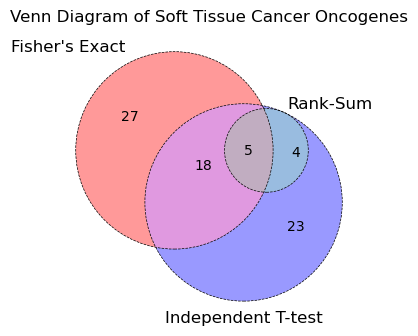

Thyroid : set()


/home/staubda2/.local/lib/python3.8/site-packages/matplotlib_venn/_venn3.py:57: UserWarning: Circle B has zero area
  warnings.warn("Circle B has zero area")


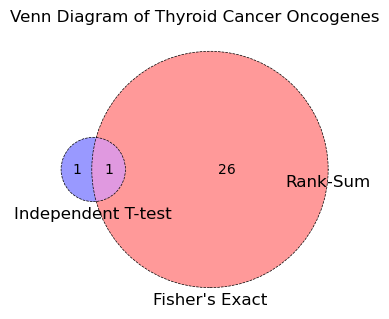

Uterus : {'PAX8', 'CCNE1'}


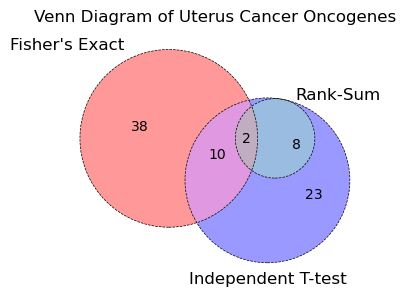

Biliary Tract : {'EGFR', 'ARHGEF7'}


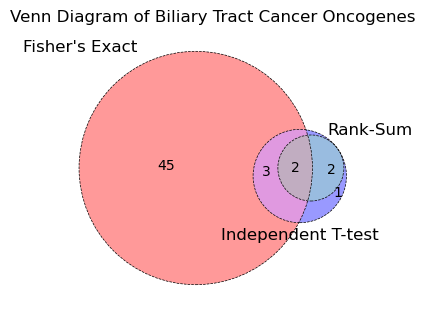

Lung : {'NKX2-1', 'UXS1', 'NFYC', 'ASPM', 'TMX2', 'BIRC6', 'DDX5', 'CDC40', 'AK4'}


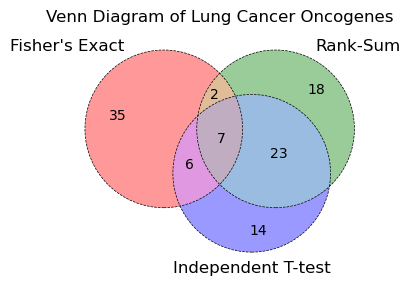

Pleura : {'EXT2', 'PPP1CC', 'ELMO2', 'VCL', 'EXTL3', 'USP1', 'TEAD1', 'FGFR1', 'YAP1', 'EXT1', 'XYLT2'}


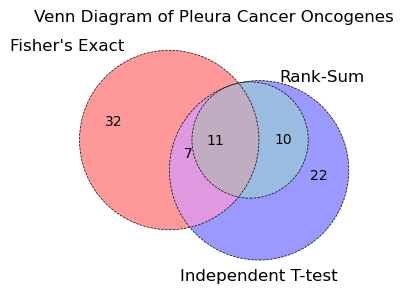

CNS/Brain : {'ZNHIT3', 'POP7', 'RPP25L', 'ITGAV', 'JUN', 'CHMP4B', 'PRKAR1A', 'SEPSECS', 'GOLT1B', 'FERMT2', 'ITGB5', 'GPX4', 'KIF18B', 'LMNA', 'TAF1A', 'C3orf38', 'NOLC1', 'BCCIP', 'POLR1E', 'CTDNEP1', 'POLR1H', 'PTPMT1', 'DSCC1', 'VRK1'}


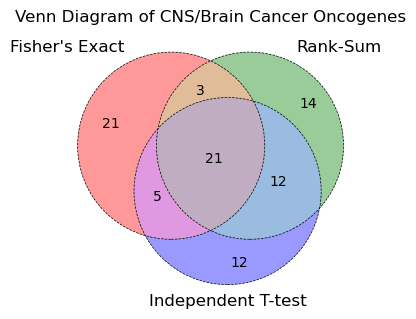

Kidney : {'CDH2', 'PDCL', 'ZFP36L1', 'SPTSSA', 'ITGAV', 'PAX8', 'COG1', 'SYVN1', 'CDC25B', 'PARD6B', 'HNF1B', 'MDM2', 'FERMT2', 'PRKCI', 'GRB2', 'PTK2', 'CFLAR', 'COG3', 'AHCYL1', 'PKN2', 'PARD3', 'KIF2C', 'PIK3CB', 'TMED10', 'UNC50', 'SEC23IP', 'TM9SF3'}


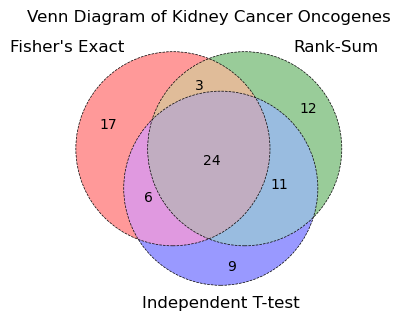

Esophagus/Stomach : {'MRPL18', 'STXBP3', 'RBM18', 'MRPS27', 'ATP5PB', 'MRPL15', 'KLF5', 'SNAP23', 'STX4', 'RAB10', 'MRPS14', 'PIK3CA'}


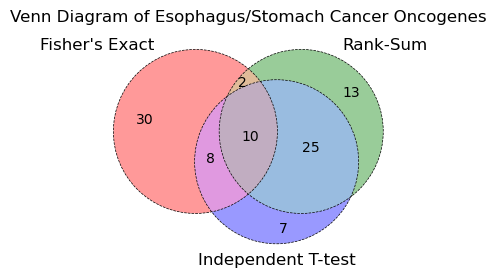

Prostate : set()


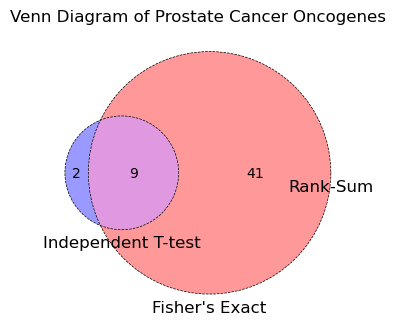

Bladder/Urinary Tract : {'TEAD3', 'SOX4'}


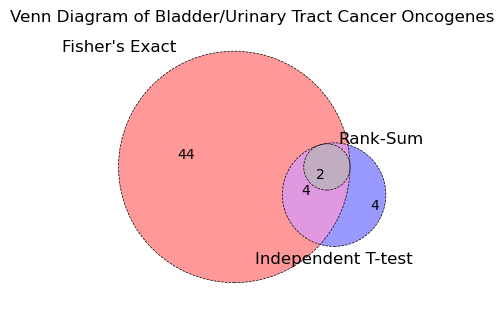

Head and Neck : {'EDF1', 'MARK2', 'ENO1', 'ANKRD49', 'CAPRIN1', 'FOSL1', 'ITGB1', 'EGFR', 'TP63', 'HNRNPM', 'TNPO1', 'ADAR', 'ARHGEF7', 'ALG8', 'GRB2', 'SLC35B2', 'DNAAF10', 'CCDC51'}


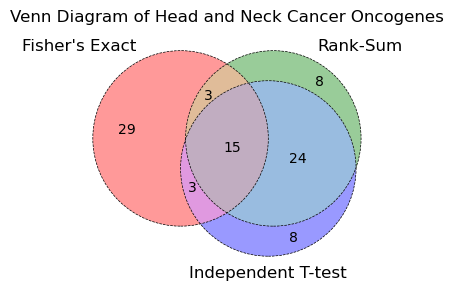

Eye : {'CCNI', 'PPM1D', 'CEP120', 'FANCA', 'E2F3', 'MDM2', 'PPM1G', 'MDM4', 'CDS2', 'TUBE1', 'RAD51B', 'SREK1', 'PUS3', 'FAM98B'}


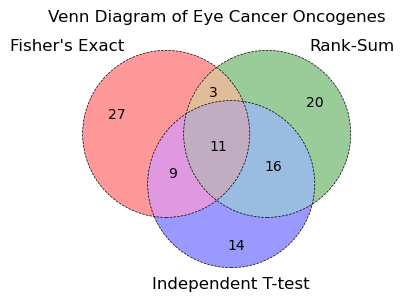

Skin : {'LCMT1', 'MAFF', 'TFAP2A', 'PPM1G', 'DCLRE1B', 'SOX10', 'SOX9', 'ACLY', 'CHMP4B', 'INTS12', 'MDM2', 'ZEB2', 'ELOA', 'FERMT2', 'MAP2K1', 'PTK2', 'CRTC3', 'PGM3', 'MITF', 'KAT7', 'EXOSC1', 'ING3', 'PPP2R2A', 'MAPK1', 'BRAF', 'DUSP4', 'PEA15', 'EGLN1', 'PPP2R1A'}


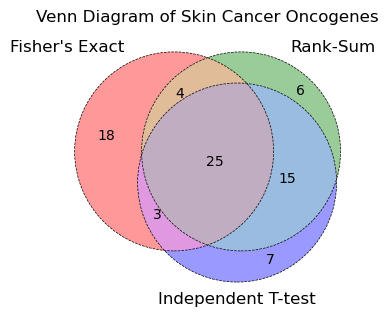

Bowel : {'KLF5', 'SNAP23', 'RABIF', 'BCL2L1', 'BMPR1A', 'MYBL2', 'CTNNB1', 'PFAS', 'CDX2', 'SCD', 'TCF7L2', 'RAB10', 'SCAP', 'RAB11A', 'NAMPT', 'FASN', 'ADSS2', 'UBE2Z', 'KRAS', 'DBF4', 'YAP1', 'TTC7A', 'PPAT'}


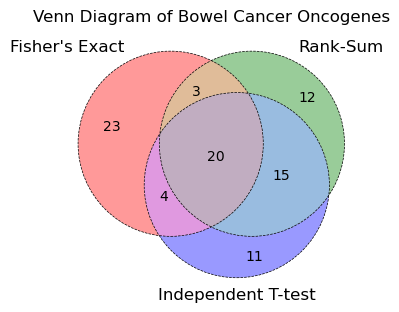

Cervix : {'ZER1', 'SKP2', 'COPS3', 'UBE3A', 'GTF2F1'}


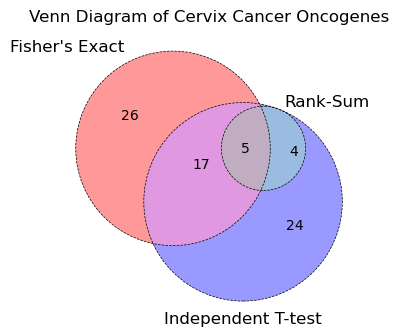

Peripheral Nervous System : {'SLC25A10', 'TRA2B', 'RTTN', 'PHOX2A', 'CHMP4B', 'HAND2', 'IRS2', 'SOX11', 'PCM1', 'MYCN', 'FURIN', 'PHOX2B', 'SMARCA4', 'CDIN1', 'CENPX', 'ISL1', 'GATA3', 'WSB2', 'TUBE1', 'NDUFAF8', 'MSI2', 'LDB1'}


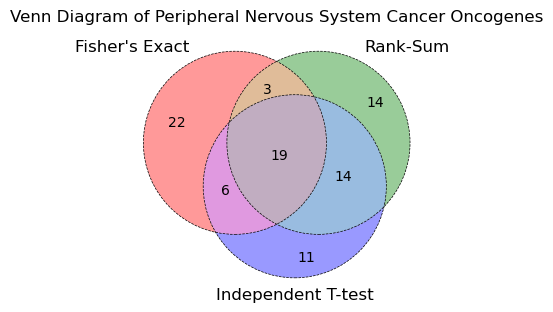

Myeloid : {'IPPK', 'GFPT1', 'CITED2', 'CBFB', 'UMPS', 'TAFAZZIN', 'CCND3', 'CDS2', 'STAT5B', 'PAICS', 'ZEB2', 'SDHB', 'CTPS1', 'MICOS10', 'ADSL', 'SLC5A3', 'DHODH', 'RFK', 'TRPM7', 'MED24', 'NAMPT', 'PEDS1', 'ADSS2', 'RUNX1', 'LDB1', 'MYB', 'GART', 'LMO2', 'FPGS', 'ATP1B3', 'CAD'}


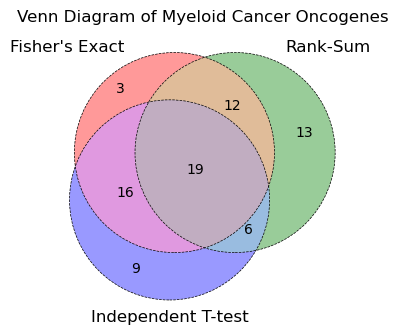

Breast : {'GRHL2', 'HECTD1', 'UXS1', 'KCMF1', 'LEMD2', 'SPDEF', 'BIRC6', 'ZFX', 'TRPS1', 'UBR4', 'FGFR4', 'FOXA1', 'RING1'}


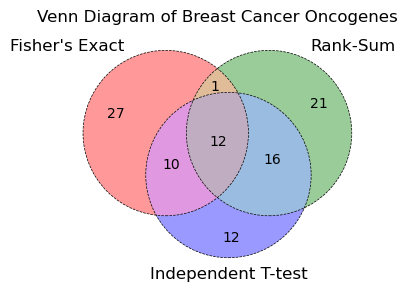

Liver : set()


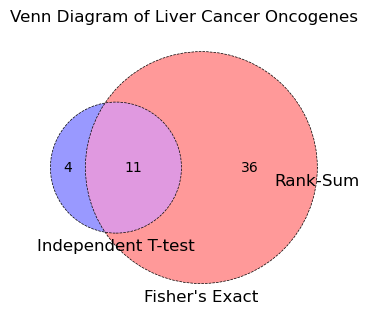

Lymphoid : {'TADA1', 'IRF4', 'IPPK', 'MBNL1', 'TCF3', 'ATIC', 'POU2AF1', 'CBFB', 'PFAS', 'UMPS', 'SH3GL1', 'GCLC', 'PAICS', 'SEPHS2', 'SDHB', 'DLST', 'AK2', 'ADSL', 'DHODH', 'PPCDC', 'NAMPT', 'CFL1', 'MTHFD1', 'NMNAT1', 'ADSS2', 'GART', 'FPGS', 'OGDH', 'EP300', 'ATP1B3', 'PPAT'}


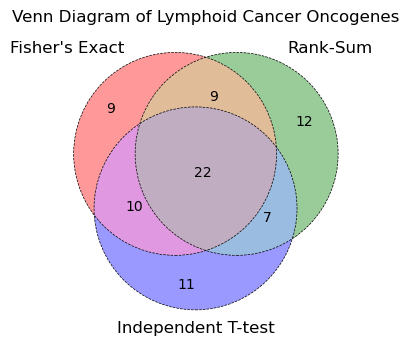

Ovary/Fallopian Tube : {'PARD3', 'GLE1', 'DDX3X', 'EIF1AX', 'STRIP1', 'PARD6B', 'CCNE1', 'FERMT2', 'FAAP24', 'CFLAR', 'PAX8', 'RABL2A'}


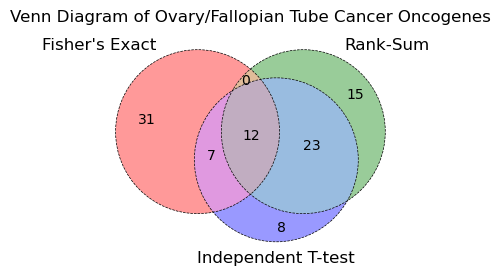

Bone : {'SRRM2', 'TRIM8', 'CNPY2', 'CHMP4B', 'SEPSECS', 'FURIN', 'NR2C2AP', 'ZEB2', 'CDK4', 'BCL2L2', 'GPX4', 'TRAIP', 'RTEL1', 'IGF1R', 'ETV6', 'FLI1', 'EEFSEC', 'RAD1', 'TXNRD1', 'STAG1', 'GLRX3', 'PSTK', 'IGF2BP1'}


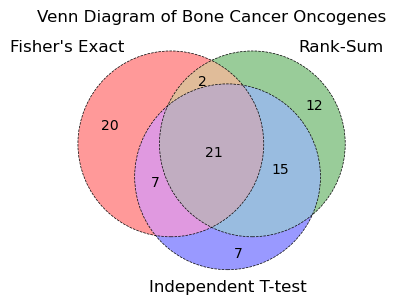

Pancreas : {'NCKAP1', 'KLF5', 'FLII', 'TLN1', 'ID1', 'NDE1', 'ARHGEF7', 'DOCK5', 'ITGA3', 'PEX6', 'BCAR1', 'CRKL', 'MYH9', 'PSMG2', 'RAB10', 'CFLAR', 'FOSL1', 'ACOX1', 'HSP90B1', 'IDH3A', 'RAF1', 'KRAS', 'EFR3A'}


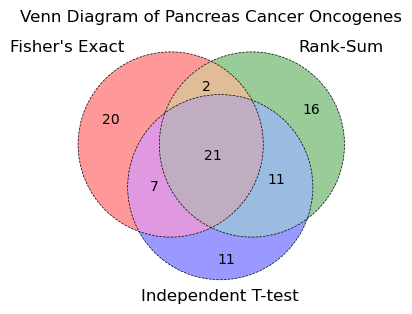

In [5]:
# import module
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt

a = crispr_depmap.col_annotation['OncotreeLineage'].value_counts()
sufficient_n = crispr_depmap.col_annotation[crispr_depmap.col_annotation['OncotreeLineage'].isin(a[a>4].index)]
disease_list = set(sufficient_n['OncotreeLineage'])
i = 0

# Fisher's Exact Test
fishers_result = pd.read_csv("fishers_compressed.csv.gz",compression='gzip')
del fishers_result['Unnamed: 0']

# Rank-Sum Test
ranksum_result = pd.read_csv("ranksum_compressed.csv.gz",compression='gzip')
del ranksum_result['Unnamed: 0']

# T-test
ttest_result = pd.read_csv("ttest_compressed.csv.gz",compression='gzip')
del ttest_result['Unnamed: 0']

for ind in disease_list:
    # Fisher's Exact Test
    ind_fisher = fishers_result.loc[(fishers_result['Indication'] == ind) & (fishers_result['P_val'] < (10**-2))]
    ind_fisher = ind_fisher.sort_values(by=['P_val']).head(50)
    
    # Rank-Sum Test
    ind_ranksum = ranksum_result.loc[(ranksum_result['Indication'] == ind) & (ranksum_result['Adjusted P_val'] < (10**-2))]
    ind_ranksum = ind_ranksum.sort_values(by=['Adjusted P_val']).head(50)
    
    # T-test
    ind_ttest = ttest_result.loc[(ttest_result['Indication'] == ind) & (ttest_result['Adjusted P_val'] < (10**-2))]
    ind_ttest = ind_ttest.sort_values(by=['Adjusted P_val']).head(50)
    
    f_genes = set(ind_fisher['Gene'])
    rs_genes = set(ind_ranksum['Gene'])
    t_genes = set(ind_ttest['Gene'])
    print(ind, ":", f_genes.intersection(rs_genes))
    
    # Separate Venn Diagrams
    plt.figure(i, figsize=(4,4))
    i += 1

    # Depict venn diagram
    venn3([f_genes, rs_genes, t_genes], ('Fisher\'s Exact', 'Rank-Sum', 'Independent T-test'))

    # Outline of circle line style and width
    venn3_circles([f_genes, rs_genes, t_genes], linestyle="dashed", linewidth=0.5)

    # Title of the venn diagram
    plt.title("Venn Diagram of " + str(ind) + " Cancer Oncogenes")
    plt.show()

In [147]:
ranksum_result.loc[(ranksum_result['Indication'] == 'Liver') & (ranksum_result['Adjusted P_val'] < 0.2)].sort_values(by=['Adjusted P_val']).head(10)

,Gene,Indication,U_val,P_val,Adjusted P_val
214706,FGFR1,Liver,-4.169992,0.000015,0.146982
221232,PTK2,Liver,-4.040008,0.000027,0.146982
220883,PPRC1,Liver,-4.128018,0.000018,0.146982
210456,ARPC4,Liver,-3.920178,0.000044,0.146982
216169,HS2ST1,Liver,-3.850447,0.000059,0.146982
214346,FAF2,Liver,-3.942519,0.000040,0.146982
214302,EXTL3,Liver,-3.868726,0.000055,0.146982
219285,NME6,Liver,-3.744835,0.000090,0.149912
217451,LDHA,Liver,-3.784778,0.000077,0.149912
216711,ITGAV,Liver,-3.761083,0.000085,0.149912


In [148]:
fishers_result.loc[(fishers_result['Indication'] == 'Liver') & (fishers_result['P_val'] < 0.05)].sort_values(by=['P_val']).head(10)

,Gene,Indication,Prob_Ratio,P_val
9849,NME6,Liver,11.283088,0.000083
8015,LDHA,Liver,8.982143,0.000090
11796,PTK2,Liver,5.297394,0.000136
1412,BCL2L1,Liver,inf,0.000208
5270,FGFR1,Liver,6.680342,0.000216
2695,CERT1,Liver,18.298246,0.000243
444,AHCYL1,Liver,4.768584,0.000309
4910,FAF2,Liver,4.850900,0.000396
2005,CALR,Liver,inf,0.000436
6733,HS2ST1,Liver,31.500000,0.000444


{'RING1', 'ZFX', 'GRHL2', 'KCMF1', 'UBR4', 'FOXA1', 'SPDEF', 'LEMD2', 'TRPS1', 'BIRC6', 'UXS1', 'HECTD1', 'FGFR4'}
{'VPS37A', 'CYP2C18', 'RAB11B', 'ITGB5', 'FMC1', 'CCDC51', 'GLUD2', 'INHBE', 'PFAS', 'MAT2A', 'RAP2C', 'TUBA1B', 'C12orf60', 'MIEN1', 'MOSPD1', 'CHRNA6', 'AKT1', 'KANSL3', 'BROX', 'HCAR2', 'RARA', 'TEX43', 'KDM2A', 'SMU1', 'CRNKL1', 'DHFR2', 'UMPS', 'ZNF703', 'NEUROD2', 'TRAF2', 'STARD3', 'IGBP1', 'JAGN1', 'ESR1', 'CDK4', 'YPEL5', 'EIF1AX', 'WDSUB1', 'CCNI2', 'CLPX', 'ZBTB7B', 'TFAP2A', 'ACO2', 'ESS2', 'TBX3', 'KAT6B', 'DDX3X', 'TFAP2C', 'PDHB', 'ARHGEF9', 'CDK18', 'PTPRN', 'GATA3', 'CPSF6', 'SMIM12', 'ARMCX4', 'DHRS7', 'RANBP2', 'CCNF', 'TSPO2', 'SDHB', 'KRT8', 'UBAP1', 'WTAP', 'TCAP', 'SMARCB1', 'NAMPT', 'HPRT1', 'RNF7', 'KMT2D', 'CWC22', 'LMX1B', 'UBA6', 'ADK'}


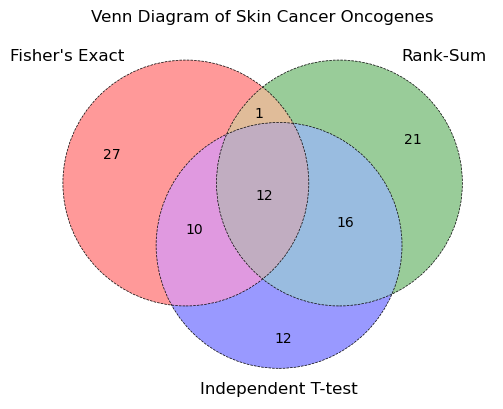

In [127]:
# Cells v. Genes on axes
# Expression levels

# fishers_result = df.set_index(df.columns[0])

# import module
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt

f_genes = set(ind_fisher['Gene'])
rs_genes = set(ind_ranksum['Gene'])
t_genes = set(ind_ttest['Gene'])
print(f_genes.intersection(rs_genes))
print(f_genes ^ rs_genes)

# plt.figure(figsize=(4,4))

# depict venn diagram
venn3([f_genes, rs_genes, t_genes], ('Fisher\'s Exact', 'Rank-Sum', 'Independent T-test'))

# outline of circle line style and width
venn3_circles([f_genes, rs_genes, t_genes], linestyle="dashed", linewidth=0.5)

# title of the venn diagram
plt.title("Venn Diagram of Skin Cancer Oncogenes")
plt.show()

Text(-70, -70, 'Unknown set')

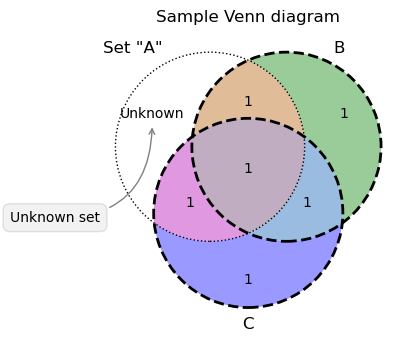

In [6]:
from matplotlib import pyplot as plt
import numpy as np
from matplotlib_venn import venn3, venn3_circles

plt.figure(figsize=(4,4))

v = venn3(subsets=(1, 1, 1, 1, 1, 1, 1), set_labels = ('A', 'B', 'C'))

v.get_patch_by_id('100').set_alpha(1.0)
v.get_patch_by_id('100').set_color('white')
v.get_label_by_id('100').set_text('Unknown')
v.get_label_by_id('A').set_text('Set "A"')
c = venn3_circles(subsets=(1, 1, 1, 1, 1, 1, 1), linestyle='dashed')
c[0].set_lw(1.0)
c[0].set_ls('dotted')
plt.title("Sample Venn diagram")
plt.annotate('Unknown set', xy=v.get_label_by_id('100').get_position() - np.array([0, 0.05]), xytext=(-70,-70),
             ha='center', textcoords='offset points', bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5',color='gray'))

In [12]:
a = crispr_depmap.col_annotation['OncotreeSubtype'].value_counts()
sufficient_n = crispr_depmap.col_annotation[crispr_depmap.col_annotation['OncotreeSubtype'].isin(a[a>4].index)]
disease_list = set(sufficient_n['OncotreeSubtype'])
len(disease_list)

a = crispr_depmap.col_annotation['OncotreeLineage'].value_counts()
sufficient_n = crispr_depmap.col_annotation[crispr_depmap.col_annotation['OncotreeLineage'].isin(a[a>4].index)]
disease_list = set(sufficient_n['OncotreeLineage'])
len(disease_list)

24

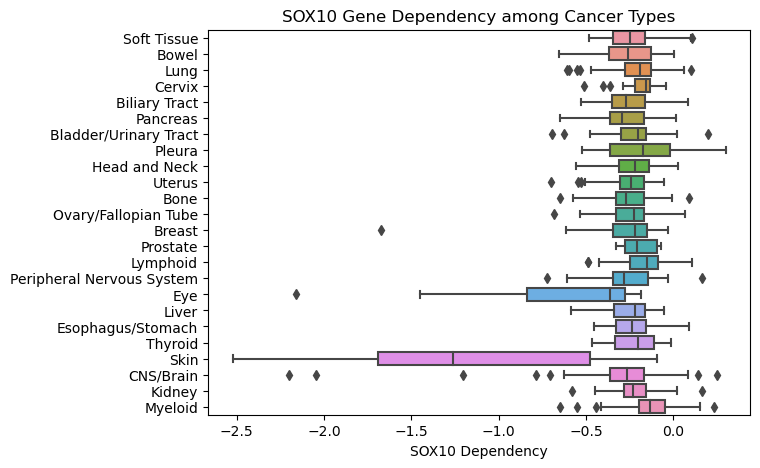

In [13]:
a = crispr_depmap.col_annotation['OncotreeLineage'].value_counts()
sufficient_n = crispr_depmap.col_annotation[crispr_depmap.col_annotation['OncotreeLineage'].isin(a[a>4].index)]
disease_list = set(sufficient_n['OncotreeLineage'])

gene = 'SOX10'
df_result = pd.DataFrame(columns = [gene, 'Indication'])

# crispr_depmap.col_annotation[crispr_depmap.col_annotation['OncotreeSubtype'] == gene]
# crispr_depmap.data.loc[gene]
for ind in disease_list:
    dep_vals = crispr_depmap.data.loc[:,crispr_depmap.col_annotation['OncotreeLineage'] == ind].loc[gene]
    # print(dep_vals)
    ind_stats = pd.DataFrame(dep_vals)
    # print(ind_stats)
    ind_stats.insert(loc=1, column='Indication', value=ind)
    
    df_result = pd.concat([df_result, ind_stats])

plt.figure(figsize=(7,5))
plt.grid(axis = 'y')
fig = sns.boxplot(data=df_result, x=gene, y="Indication")

fig.set_title('SOX10 Gene Dependency among Cancer Types')
fig.set_xlabel('SOX10 Dependency')
fig.set_ylabel('')

plt.show()

In [9]:
# Fisher's Exact Test
fishers_result = pd.read_csv("fishers_compressed.csv.gz",compression='gzip')
del fishers_result['Unnamed: 0']

# Rank-Sum Test
ranksum_result = pd.read_csv("ranksum_compressed.csv.gz",compression='gzip')
del ranksum_result['Unnamed: 0']

# T-test
ttest_result = pd.read_csv("ttest_compressed.csv.gz",compression='gzip')
del ttest_result['Unnamed: 0']

fishers_result.sort_values(by=['P_val']).head(10)

,Gene,Indication,Prob_Ratio,P_val
83845,SOX10,Skin,103.578947,3.455903e-51
373733,IRF4,Lymphoid,124.827957,8.715062e-50
377816,POU2AF1,Lymphoid,inf,3.927172e-47
370880,EBF1,Lymphoid,499.000000,4.527452e-47
367698,ATP1B3,Lymphoid,47.631579,1.539306e-46
376367,NMNAT1,Lymphoid,47.898058,2.806099e-46
71383,BRAF,Skin,57.634286,2.977371e-38
375159,MBNL1,Lymphoid,39.460331,3.374331e-38
61706,MYB,Myeloid,220.000000,1.605198e-37
377012,PAX5,Lymphoid,329.127660,3.186299e-36
